In [1]:
import pandas

In [2]:
stock_info=pandas.read_csv('Stock_Dataset.csv')

In [3]:
stock_info

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change,Price_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836,-0.012635
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364,-0.015849
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683,-0.026000
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713,0.001992
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283,0.032787
...,...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748,-0.014501
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949,-0.051572
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307,0.029715
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784,-0.020466


Since each of the columns are made of quantitative data, there is not need for one hot encoding. Since the majority of columns have less than 5% missing data as well, it is also better to simply impute the datas with means to begin. In this case, any and all cleaning consisted in a simple mean imputation accross the columns to fill in the individual missing data.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from seaborn import scatterplot

In [41]:
y=stock_info.iloc[:,-1:]
x=stock_info.iloc[:,:-1]

In [42]:
x

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283
...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784


In [43]:
y

,Price_Change
0,-0.012635
1,-0.015849
2,-0.026000
3,0.001992
4,0.032787
...,...
8108,-0.014501
8109,-0.051572
8110,0.029715
8111,-0.020466


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=421,test_size=0.225,shuffle=True)

In [110]:
len(x_test)

1826

In [111]:
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,random_state=124,test_size=0.375,shuffle=True)

In [112]:
print(len(x_train),len(x_test),len(x_val))

6287 1141 685


In [113]:
x_test

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
7400,-0.215265,0.741011,0.628837,-0.066793,0.000000,0.022472,1.169978,-0.067869
6004,0.354060,1.791460,1.203852,0.072393,0.000000,0.132195,1.452514,4.292141
756,-0.019502,1.415451,0.124257,0.039250,0.071636,-0.011263,1.195891,-2.513369
6452,0.416863,2.728711,0.597570,0.080607,0.056373,0.077340,1.369347,2.163207
4977,-0.153284,1.000000,-0.091345,0.076773,0.050448,-0.171630,77.705576,31.918885
...,...,...,...,...,...,...,...,...
7090,0.165354,1.768317,0.738486,0.091274,0.016449,0.043311,0.984829,0.786656
5557,0.132901,1.000000,0.092423,0.108441,0.000000,0.000000,0.443647,0.434162
6961,0.048194,1.632897,0.138455,0.063026,0.000000,0.059897,0.738741,0.520305
4913,-0.132208,4.458342,0.241853,0.091569,0.005403,-0.062573,0.505234,-0.671463


In [114]:
def x_imputer(dataset):
    imputer=KNNImputer(n_neighbors=3)
    x_impute=imputer.fit_transform(dataset)
    x_impute=pandas.DataFrame(data=x_impute,columns=['Return_On_Equity','Current_Ratio','Asster_Turnover','WACC','Dividend_Yield','Earnings_Yield','Revenue_Change','Net_Income_Change'])
    return x_impute
x_train=x_imputer(x_train)
x_test=x_imputer(x_test)
x_val=x_imputer(x_val)

y_train=y_train.apply(lambda col: col.fillna(col.mean()))
y_test=y_test.apply(lambda col: col.fillna(col.mean()))
y_val=y_val.apply(lambda col: col.fillna(col.mean()))

In [12]:
'''
Previous method of imputation, utilizing the average of the column. 
Using KNN may create a slightly more accurate model.

x_train=x_train.apply(lambda col: col.fillna(col.mean()))
x_test=x_test.apply(lambda col: col.fillna(col.mean()))
x_val=x_val.apply(lambda col: col.fillna(col.mean()))

'''

In [115]:
x_test

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
0,-0.215265,0.741011,0.628837,-0.066793,0.000000,0.022472,1.169978,-0.067869
1,0.354060,1.791460,1.203852,0.072393,0.000000,0.132195,1.452514,4.292141
2,-0.019502,1.415451,0.124257,0.039250,0.071636,-0.011263,1.195891,-2.513369
3,0.416863,2.728711,0.597570,0.080607,0.056373,0.077340,1.369347,2.163207
4,-0.153284,1.000000,-0.091345,0.076773,0.050448,-0.171630,77.705576,31.918885
...,...,...,...,...,...,...,...,...
1136,0.165354,1.768317,0.738486,0.091274,0.016449,0.043311,0.984829,0.786656
1137,0.132901,1.000000,0.092423,0.108441,0.000000,0.000000,0.443647,0.434162
1138,0.048194,1.632897,0.138455,0.063026,0.000000,0.059897,0.738741,0.520305
1139,-0.132208,4.458342,0.241853,0.091569,0.005403,-0.062573,0.505234,-0.671463


In [116]:
x_train

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
0,-0.440353,2.834460,2.231445,0.055935,0.023880,0.061973,1.138429,1.443292
1,-0.599763,8.714004,0.000000,0.108002,0.000000,-0.400000,1.000000,1.124629
2,0.519849,1.000000,0.578043,0.085320,0.000000,1.241667,8.422570,98.363636
3,0.059726,1.000000,0.035593,0.065737,0.040085,0.086099,0.954312,0.852931
4,0.830130,0.982617,1.846205,0.070977,0.000000,0.352004,1.257958,-1.333459
...,...,...,...,...,...,...,...,...
6282,0.506276,2.078808,0.678737,0.105274,0.000000,0.158498,1.579680,-1.184209
6283,-1.108158,4.031179,0.000000,0.110013,0.000000,-2.657480,1.000000,0.639946
6284,0.200243,0.501581,0.699729,0.065087,0.000000,0.063454,1.691762,4.707143
6285,0.075097,0.644162,0.201158,0.054819,0.035432,0.033688,1.008023,-1.591049


In [117]:
x_train.isnull().astype(int).sum()/len(x_train)

Return_On_Equity     0.0
Current_Ratio        0.0
Asster_Turnover      0.0
WACC                 0.0
Dividend_Yield       0.0
Earnings_Yield       0.0
Revenue_Change       0.0
Net_Income_Change    0.0
dtype: float64

In [118]:
y_train=y_train.pop('Price_Change')
y_test=y_test.pop('Price_Change')
y_val=y_val.pop('Price_Change')

In [119]:
neighbor=KNeighborsRegressor(n_neighbors=3)

In [120]:
neighbor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [121]:
y_predict=neighbor.predict(x_test.values)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [123]:
len(y_predict)

1141

<Axes: xlabel='Price_Change'>

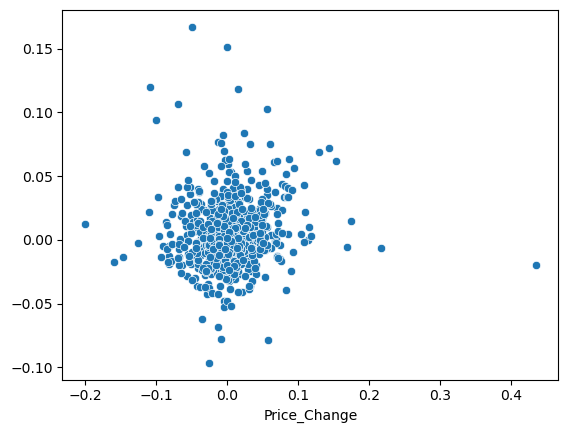

In [126]:
scatterplot(x=y_test,y=y_predict)

In [127]:
error=(mean_squared_error(y_test,y_predict)**.5)
error

0.04048747690127577

Sensitivity analysis of Kneighbors

In [128]:
errors=[]
for k in list(range(0,100)):
    neighbor=KNeighborsRegressor(n_neighbors=k+1)
    neighbor.fit(x_train,y_train)
    y_predict=neighbor.predict(x_test.values)
    error=(mean_squared_error(y_test,y_predict)**.5)*100
    errors.append(error)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning

In [129]:
min_k_error=errors.index(min(errors))+1
min_error=errors[min_k_error-1]
print("A neighbor count of "+str(min_k_error)+" yields the lowest stanadrd error of "+str(min_error)+"%.")

A neighbor count of 48 yields the lowest stanadrd error of 3.5374217980667124%.


In [130]:
print((-1.96*min_error),(1.96*min_error))

-6.9333467242107565 6.9333467242107565


A further sensitivity analysis can be utilized with the splits between training and test data, but it appears that the model's standard error won't stray far from 3.5%, leading to a 95% confidence interval range of 12%. In terms of grading the model, it is extremely inacurate seeing how the goal is to reduce error to less than 3%. However, it gives a baseline for future models. The reason for this could be a problem with the fundemental assumptions in the data. I do not believe that all of the ratios are normally distributed. The dividend ratio seems to follow a pareto distribution and net income differential seems to follow a heavily right skewed distribution. K Nearest Neighbor should be able to account for these issues, but there are also some points which are imputed to disrupt the distribution. K nearest neighbor is incredibly sensitive to fabricated data, and with some columns having even 5-10% of data being imputed, it heavily pulls the standard error of the model away from 0.

Final Evaluation of Model

In [131]:
neighbor=KNeighborsRegressor(n_neighbors=13)
neighbor.fit(x_train,y_train)
y_evaluation=neighbor.predict(x_val.values)
error=(mean_squared_error(y_val,y_evaluation)**.5)*100

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [132]:
print(error)

3.239386678436308


95% confidence interval for error

In [133]:
print((-1.96*error),(1.96*error))

-6.349197889735164 6.349197889735164
